This module is about weight decay for deep learning.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


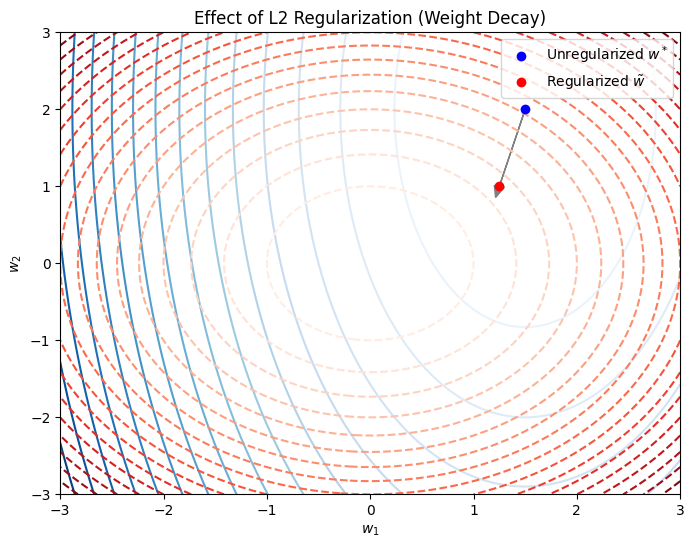

In [12]:
# Hessian matrix: high curvature in w1, low in w2
H = np.array([[5, 0],
              [0, 1]])

# Unregularized optimum
w_star = np.array([1.5, 2.0])

# Regularization strength
alpha = 1.0

# Compute regularized optimum
I = np.eye(2)
w_tilde = np.linalg.inv(H + alpha * I) @ H @ w_star

# Create grid for contour plotting
w1 = np.linspace(-3, 3, 400)
w2 = np.linspace(-3, 3, 400)
W1, W2 = np.meshgrid(w1, w2)

# Original loss contours (quadratic form)
loss = 0.5 * (H[0,0]*(W1 - w_star[0])**2 + H[1,1]*(W2 - w_star[1])**2)

# L2 penalty contours
l2_penalty = 0.5 * alpha * (W1**2 + W2**2)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.contour(W1, W2, loss, levels=20, cmap='Blues', linestyles='solid')
ax.contour(W1, W2, l2_penalty, levels=20, cmap='Reds', linestyles='dashed')

# Mark points
ax.plot(*w_star, 'bo', label='Unregularized $w^*$')
ax.plot(*w_tilde, 'ro', label='Regularized $\~w$')

# Arrow showing movement
ax.arrow(w_star[0], w_star[1],
         w_tilde[0] - w_star[0],
         w_tilde[1] - w_star[1],
         head_width=0.1, fc='gray', ec='gray')

ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
ax.set_title('Effect of L2 Regularization (Weight Decay)')
ax.legend()
plt.show()


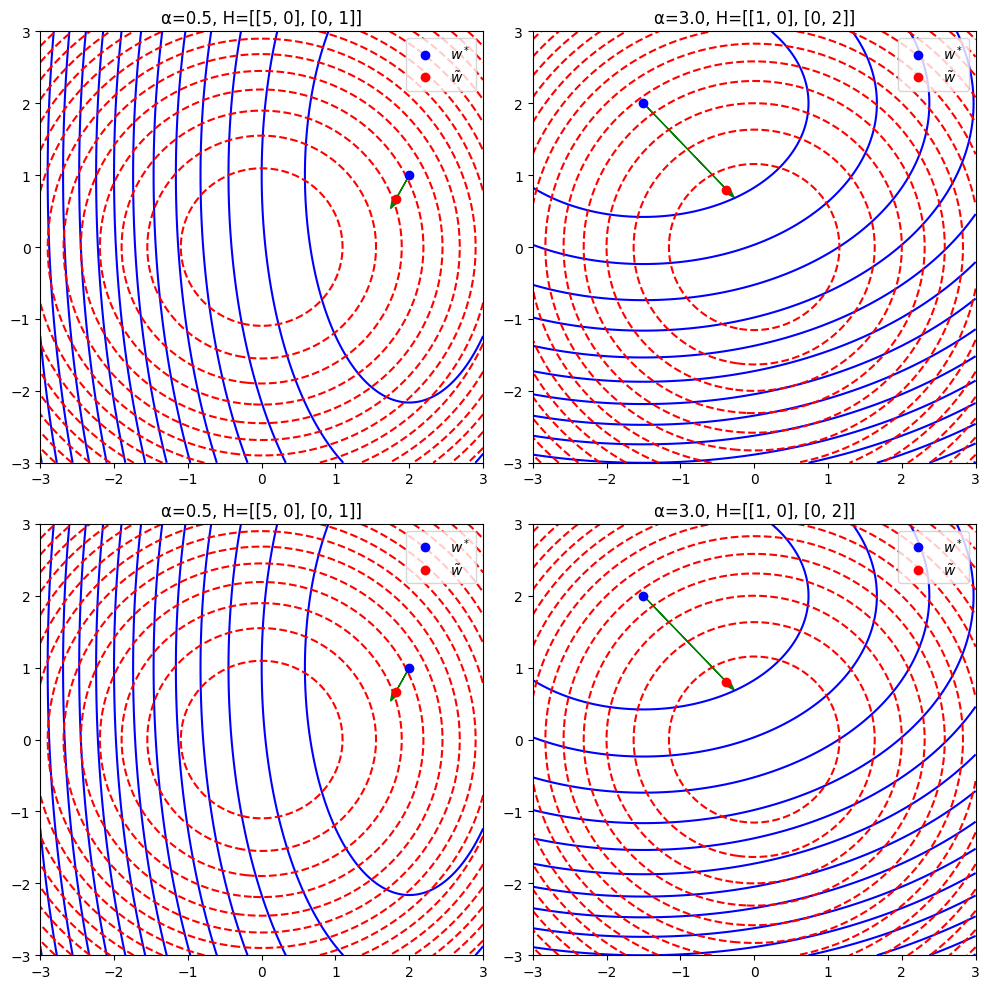

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def compute_w_tilde(H, w_star, alpha):
    I = np.eye(2)
    return np.linalg.inv(H + alpha * I) @ H @ w_star

def plot_effect(ax, H, w_star, alpha):
    w_tilde = compute_w_tilde(H, w_star, alpha)

    # Grid for contours
    w1 = np.linspace(-3, 3, 200)
    w2 = np.linspace(-3, 3, 200)
    W1, W2 = np.meshgrid(w1, w2)
    loss = 0.5 * (H[0,0]*(W1 - w_star[0])**2 + H[1,1]*(W2 - w_star[1])**2)
    penalty = 0.5 * alpha * (W1**2 + W2**2)

    # Plot contours
    ax.contour(W1, W2, loss, levels=15, colors='blue', linestyles='solid')
    ax.contour(W1, W2, penalty, levels=15, colors='red', linestyles='dashed')

    # Points and arrow
    ax.plot(*w_star, 'bo', label='$w^*$')
    ax.plot(*w_tilde, 'ro', label='$\\tilde{w}$')
    ax.arrow(w_star[0], w_star[1],
             w_tilde[0] - w_star[0],
             w_tilde[1] - w_star[1],
             head_width=0.1, fc='green', ec='green')

    ax.set_title(f'α={alpha}, H={H.tolist()}')
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.legend()

# Different scenarios
Hs = [np.array([[5, 0],[0, 1]]), np.array([[1, 0],[0, 2]])]
w_stars = [np.array([2, 1]), np.array([-1.5, 2])]
alphas = [0.5, 3.0]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for ax, H, w_star, alpha in zip(axes.flat, Hs*2, w_stars*2, alphas*2):
    plot_effect(ax, H, w_star, alpha)

plt.tight_layout()
plt.show()


How to interpretate the graph?
blue solid line: Contour of orginal loss function (Narrow -> changes quickly, wide -> Changes slowly)
Red dashed circle: Contour of L2 penalty (Alwasy perfectly circular)
It shows how the optimum points changed when there is a regularization.

What is the difference between L2 and L1 regularization?
L2: Shrinks all weights proportionally toward zero, never make them exactly zero
L1: Pushes weights toward zero with constant amount, can make them exactly zero

In short, L2 keeps weights small but nonzero, L1 make some weights exactly zero (Remove some features)

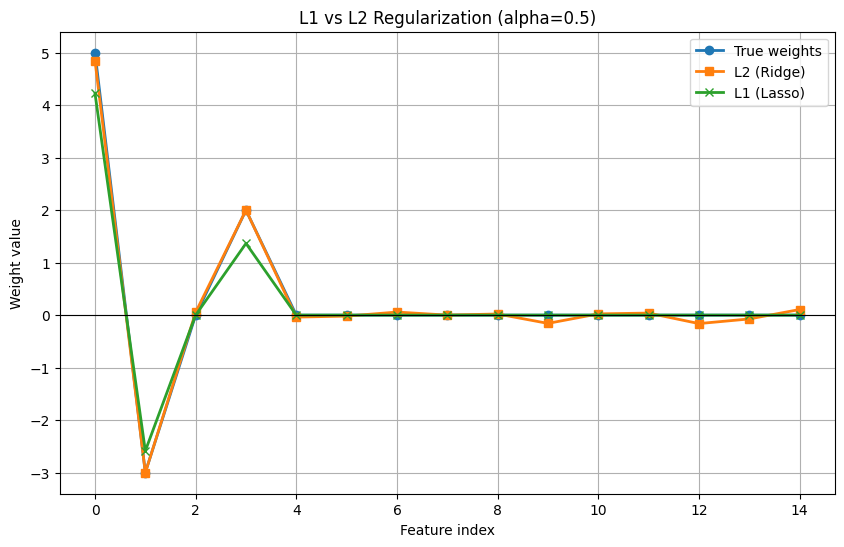

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso

# Reproducibility
np.random.seed(42)

# Create synthetic data
n_samples, n_features = 50, 15
X = np.random.randn(n_samples, n_features)

# True weights: only first 5 features matter
true_w = np.zeros(n_features)
true_w[:5] = [5, -3, 0, 2, 0]  # some zeros even in important features

# Generate targets with noise
y = X @ true_w + np.random.randn(n_samples) * 0.5

alpha = 0.5

# L2 regularization (Ridge)
ridge = Ridge(alpha=alpha)
ridge.fit(X, y)

# L1 regularization (Lasso)
lasso = Lasso(alpha=alpha)
lasso.fit(X, y)

plt.figure(figsize=(10, 6))
indices = np.arange(n_features)

plt.plot(indices, true_w, 'o-', label='True weights', linewidth=2)
plt.plot(indices, ridge.coef_, 's-', label='L2 (Ridge)', linewidth=2)
plt.plot(indices, lasso.coef_, 'x-', label='L1 (Lasso)', linewidth=2)

plt.axhline(0, color='black', linewidth=0.8)
plt.xlabel('Feature index')
plt.ylabel('Weight value')
plt.title(f'L1 vs L2 Regularization (alpha={alpha})')
plt.legend()
plt.grid(True)
plt.show()


L1 is usually used for feature selection.
L2 is for weight shrinking and stability